OBJECTIVE

The decision tree uses the features of a bank client to predict whether or not they will make a deposit.
It aim to create a model that can accurately classify clients into two categories: those likely to make a deposit and those unlikely to make a deposit.

Accuracy: 0.76


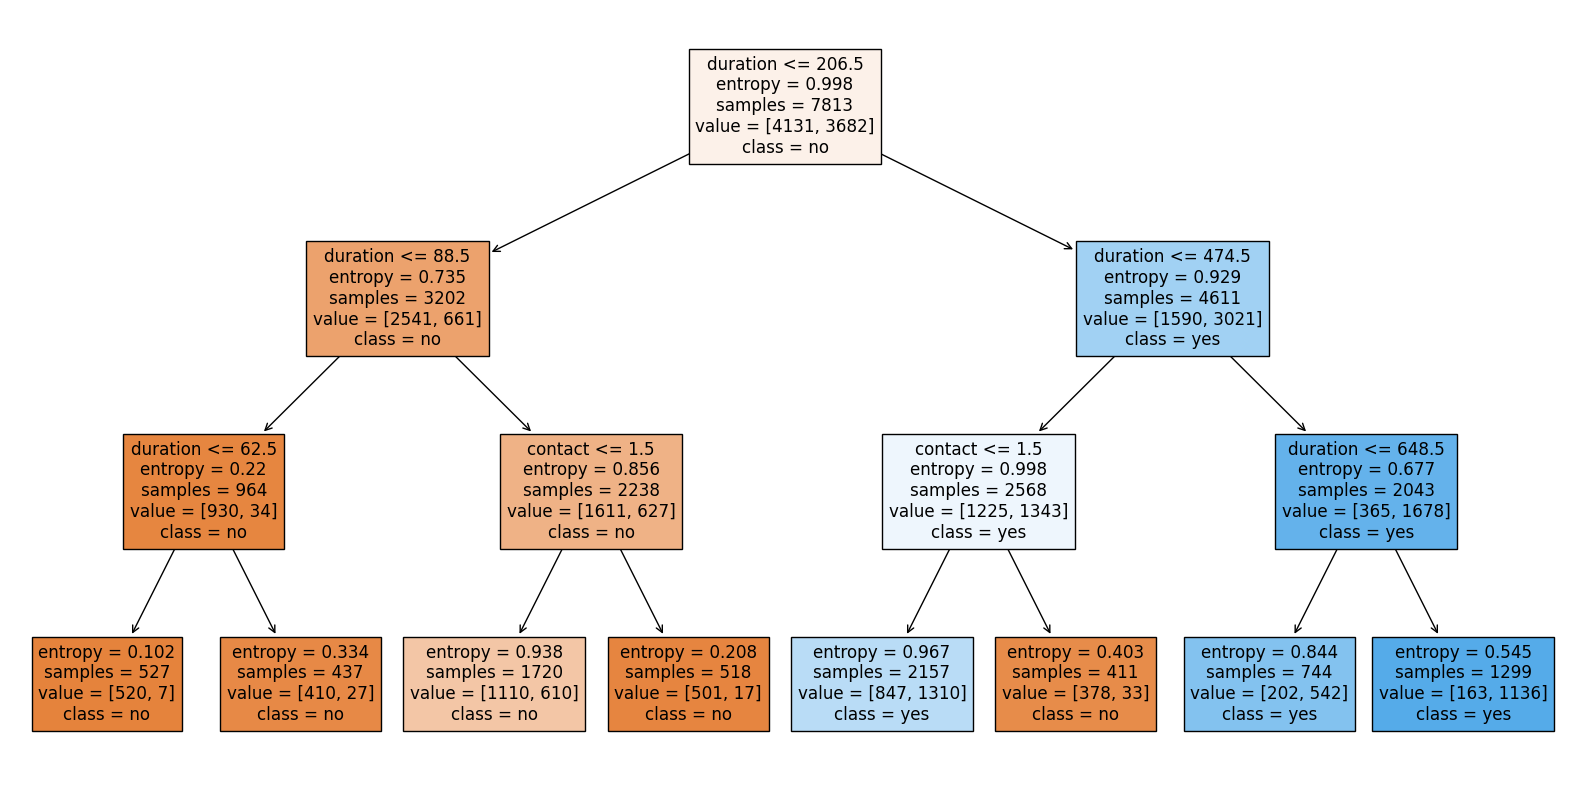

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

data = pd.read_csv('bank.csv')

label_encoder = LabelEncoder()

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop('deposit', axis=1)
y = data['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_encoder.classes_, filled=True)
plt.show()


The model predicts correctly 76% of the time on the test set. 
The decision tree starts at the root node, which in this case considers the duration of the last contact (in seconds). If the duration is less than or equal to 206.5 seconds, the entropy is 0.998, which means the data is highly uncertain. From here, the tree splits into two branches. 
The left branch considers clients who had a last contact of less than or equal to 88.5 seconds. The entropy here is 0.735, which is slightly less uncertain than the root node. This branch splits again, considering clients who had a contact duration of less than or equal to 62.5 seconds. The entropy here is 0.22, which means the data is more certain. Finally, the tree splits again considering whether the client contacted the bank within the last 1.5 days. Clients who did not contact the bank within the last 1.5 days are less likely to make a deposit (entropy = 0.938). Clients who did contact the bank within the last 1.5 days are more likely to make a deposit (entropy = 0.208).
The right branch of the root node considers clients who had a last contact duration greater than 206.5 seconds. The entropy here is 0.929. This branch splits again, considering clients who had a contact duration of less than or equal to 474.5 seconds. The entropy here is 0.677. This branch splits again considering whether the client contacted the bank within the last 1.5 days. Clients who did not contact the bank within the last 1.5 days are less likely to make a deposit (entropy = 0.998). Clients who did contact the bank within the last 1.5 days are more likely to make a deposit (entropy = 0.403).

CONCLUSION

The decision tree uses the duration of the last contact, and whether the client contacted the bank within the last 1.5 days, to predict whether or not a client will make a deposit. Clients who have had a shorter duration contact and have contacted the bank more recently are more likely to make a deposit.